# Exploratory Data Analysis



Documentation:
- https://github.com/fivethirtyeight/data/tree/master/pollster-ratings

We will be looking at `raw-polls.csv`

In [1]:
import pandas as pd

# Always display all columns (no matter how many there are)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from plotnine import *

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# read raw_polls.csv from FiveThirtyEighta
raw_polls_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv'
polls = pd.read_csv(raw_polls_url, parse_dates=['electiondate', 'polldate'])

# saves a copy of this CSV onto your computer
polls.to_csv('raw_polls.csv', index=False) 

# add a column to separate national polls from state level polls
polls['national'] = polls['location'].apply(lambda x: True if x=='US' else False)

# add a column that counts the days until the election
polls['days_until_election'] = polls['electiondate'] - polls['polldate']

# show the first 2 rows of the data frame
polls.head(2)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,national,days_until_election
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,Live Phone,NaN,1998-10-13,364.0,Peter Vallone,13080,DEM,26.0,George Pataki,13083,REP,57.0,9.0,-31.0,1998-11-03,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York),False,21 days
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,Live Phone,NaN,1998-10-13,540.0,Lee Fisher,13085,DEM,37.0,Bob Taft,13086,REP,52.0,NaN,-15.0,1998-11-03,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN,False,21 days


Remember, `raw_polls.csv` contains all polls within 3 weeks of any:
- presidential primary or general election (state and national level)
- senate, gubernatorial, or house general election
- national level generic house polls

_hint: you may want to do some filtering as you do your analysis!_

# Descriptive Stats

In [3]:
# example of summary statistics using describe()
# hint...you may want to try some summary statistics after applying filters
polls.describe()[['error', 'bias']].round(2)

,error,bias
count,10776.00,8824.00
mean,5.51,0.63
std,4.87,6.33
min,0.00,-40.24
25%,2.02,-3.33
50%,4.34,0.68
75%,7.58,4.62
max,50.89,42.94


In [4]:
# example of a pivot table
piv = polls.pivot_table(
    index='year',
    columns='type_simple',
    values='error',
    aggfunc=['mean', 'std', 'count']
).round(1).fillna('')

piv

mean                               std                        \
type_simple Gov-G House-G Pres-G Pres-P Sen-G Gov-G House-G Pres-G Pres-P   
year                                                                        
1998          8.1     6.9                 6.8   5.5     5.7                 
1999          6.6                               6.3                         
2000          3.7     4.6    4.4    7.9   5.4   3.1     3.2    3.2    5.5   
2001          3.4                               2.4                         
2002          5.4     5.5                 4.9   3.8     3.7                 
2003          7.1                               4.8                         
2004          3.2     5.4    3.1    7.1   5.0   2.1     3.4    2.4    6.9   
2005          3.7                               2.2                         
2006          4.7     6.0                 5.2   3.7     4.4                 
2007          3.7     2.8                       1.7                         
2008          4.7     5.8    3.4    7.4   4.9   4.1     4.9    3.0    6.3   
2009          4.0     6.2                       3.0     5.6                 
2010          4.7     6.7                 5.4   3.7     5.6                 
2011          5.5     3.7                       2.6     4.2                 
2012          4.7     5.4    3.6    8.6   4.7   3.5     5.3    2.7    7.0   
2013          5.7    10.9                 3.4   4.2     4.6                 
2014          4.8     6.7                 5.3   4.2     6.1                 
2015          6.3    23.0                       4.0                         
2016          6.2     5.3    5.0    9.4   5.4   4.7     4.6    3.9    7.8   
2017          5.2     4.0                 6.0   4.1     2.8                 
2018          4.7     4.9                 4.1   3.2     4.4                 
2019          4.9     6.2                       4.2     5.3                 
2020          7.0     6.6    4.8   10.2   5.6   4.7     4.5    3.2    8.3   

                   count                               
type_simple Sen-G  Gov-G House-G Pres-G Pres-P  Sen-G  
year                                                   
1998          4.5  120.0    57.0                102.0  
1999                 4.0                               
2000          4.5   43.0    67.0  375.0  187.0  194.0  
2001                13.0                               
2002          4.1  190.0   105.0                158.0  
2003                38.0                               
2004          4.2   37.0   102.0  432.0  131.0  187.0  
2005                26.0                               
2006          4.3  212.0   224.0                233.0  
2007                 8.0     1.0                       
2008          4.7   57.0   162.0  564.0  636.0  220.0  
2009                39.0     9.0                       
2010          4.5  261.0   252.0                304.0  
2011                 6.0    11.0                       
2012          3.3   57.0   135.0  471.0  222.0  245.0  
2013          3.2   22.0     4.0                 22.0  
2014          4.2  226.0   117.0                226.0  
2015                20.0     1.0                       
2016          4.5   69.0    65.0  508.0  458.0  271.0  
2017          2.7   31.0    21.0                 19.0  
2018          3.1  165.0   209.0                187.0  
2019                25.0     4.0                       
2020          3.9   43.0   106.0  590.0  187.0  283.0

/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 1959 rows containing missing values.


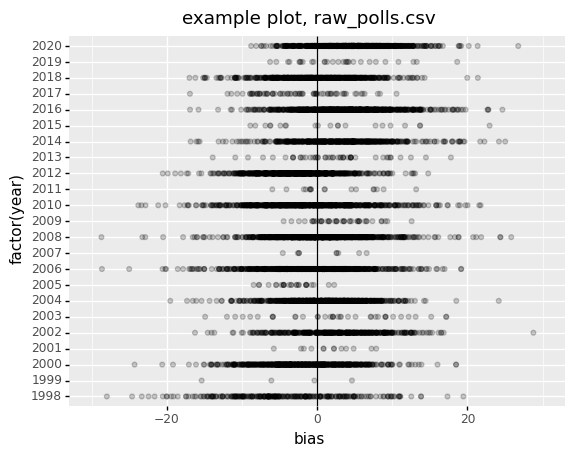

<ggplot: (671187532)>

In [5]:
# Example dot plot
# You can also use other chart types (like histograms) if you'd like!
# Hint: Make sure you read the warnings in red whenever they appear!

(
    ggplot() + 
        geom_point(polls, aes(x='bias', y='factor(year)'), alpha=.2, fill='black') + 
        geom_vline(aes(xintercept=0)) +
        xlim(-30, 30) + 
        labs(title = "example plot, raw_polls.csv")
)


/Users/owner/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 102'. Pick better value with 'binwidth'.


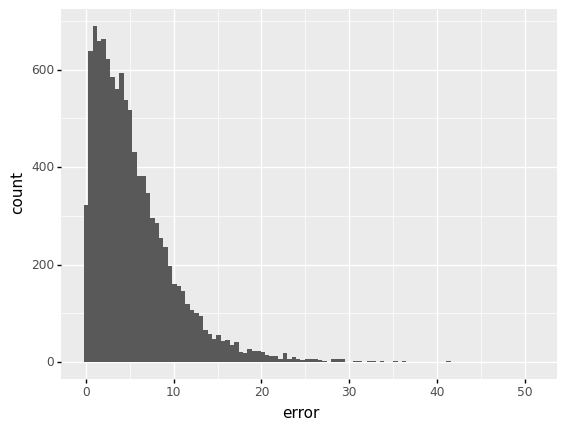

<ggplot: (671150535)>

In [6]:
# example histogram
# hint: you may want try filtering or using facet_wrap
(
    ggplot() + 
        geom_histogram(polls, aes(x='error'))
)


👉Your turn! Modify the cells above to get a better sense of the "shape" of the data. 
Conduct more exploratory data visualization below. What questions do you have about this data? 

### Hypothesis: Public opinion polling in the US is becoming less reliable.

In the notebook below, explore this hypothesis. Is it true? Is it false? Is it...complicated? _(hint: it's complicated)_

Explain your answer below. You can use words (in markdown cells like this one) and visuzalizations in either plotnine or ggplot2.

## Response 1

When you're doing exploratory data analysis, sometimes you can draw conclusions, sometimes the analysis raises more questions. Show a peice of your analysis below in Python -- the cell can output a dataframe, a chart, or something else, just make sure to print the variables you'd like us to look at as output from the cell. In the markdown cell that follows, first explain either the conclusion you drew or the new question you have. Then answer the questions about that analysis.

In [18]:
# Your analysis code here (it can output a chart, a dataframe, or something else). 
# Feel free to add a few more cells here if you need them to keep your code clean,
# Just make sure you print out the variable you want me to look at in the last cell 👉

# polls[['type_simple' == 'Pres-G']].round(2)
presidential = polls[(polls.type_simple == 'Pres-G') & (polls.year == ]




,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment,national,days_until_election
470,6478,7947,40,2000,2000_Pres-G_US,US,Pres-G,Pres-G,Zogby Interactive/JZ Analytics,395,Live Phone,NaN,2000-10-17,1200.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,44.0,5.0,-1.0,2000-11-07,48.31,47.79,0.51,1.51,-1.51,0.0,-3.191935,for Reuters | MSNBC,True,21 days
471,6483,7952,815,2000,2000_Pres-G_FL,FL,Pres-G,Pres-G,McLaughlin & Associates,203,Live Phone,R,2000-10-17,600.0,Al Gore,222,DEM,43.0,George W. Bush,241,REP,44.0,3.0,-1.0,2000-11-07,48.84,48.85,-0.01,0.99,-0.99,1.0,-3.534693,for Bill McCollum,False,21 days
472,6470,7939,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,KRC Research,160,Live Phone,NaN,2000-10-17,600.0,Al Gore,222,DEM,45.0,George W. Bush,241,REP,43.0,4.0,2.0,2000-11-07,54.60,42.58,12.01,10.01,-10.01,1.0,3.420487,NaN,False,21 days
473,6473,7942,820,2000,2000_Pres-G_IL,IL,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,2000-10-17,601.0,Al Gore,222,DEM,47.0,George W. Bush,241,REP,40.0,3.0,7.0,2000-11-07,54.60,42.58,12.01,5.01,-5.01,1.0,-1.918393,NaN,False,21 days
474,6474,7943,836,2000,2000_Pres-G_NH,NH,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,2000-10-17,603.0,Al Gore,222,DEM,44.0,George W. Bush,241,REP,41.0,1.0,3.0,2000-11-07,46.80,48.07,-1.27,4.27,4.27,0.0,-1.067767,NaN,False,21 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,72754,136533,8718,2020,2020_Pres-G_N2,N2,Pres-G,Pres-G,"University of Nevada, Las Vegas Lee Business S...",609,Online,NaN,2020-11-01,191.0,Joseph R. Biden Jr.,13256,DEM,50.2,Donald Trump,13254,REP,44.3,5.4,5.9,2020-11-03,51.95,45.45,6.50,0.60,-0.60,1.0,-4.877900,NaN,False,2 days
10737,73830,138491,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,Lake Research Partners,165,Live Phone,D,2020-11-02,2400.0,Joseph R. Biden Jr.,13256,DEM,51.0,Donald Trump,13254,REP,48.0,NaN,3.0,2020-11-03,51.31,46.86,4.45,1.45,-1.45,1.0,-1.479772,for unspecified Democratic sponsor,True,1 days
10738,72722,136491,6220,2020,2020_Pres-G_FL,FL,Pres-G,Pres-G,Opinion Savvy/InsiderAdvantage,243,IVR/Live Phone,NaN,2020-11-02,400.0,Joseph R. Biden Jr.,13256,DEM,47.0,Donald Trump,13254,REP,48.2,1.6,-1.2,2020-11-03,47.86,51.22,-3.36,2.16,2.16,1.0,-3.481266,for FOX35 Orlando,False,1 days
10739,72621,136283,6223,2020,2020_Pres-G_IA,IA,Pres-G,Pres-G,Public Policy Polling,263,IVR/Text,NaN,2020-11-02,871.0,Joseph R. Biden Jr.,13256,DEM,49.0,Donald Trump,13254,REP,48.0,NaN,1.0,2020-11-03,44.89,53.09,-8.20,9.20,9.20,0.0,2.738601,among 'voters',False,1 days


**Question: What conclusion have you drawn or question have you developed from the code in the cell above?**

Answer: 👉

**Question: What methodological choices did you make in the cell above?**

Answer: 👉

**Question: What are the implications and limitations of that choice?**

Answer: 👉

**Question: How might you get an answer to the question? Reporting? Regression analysis? Something else?**

Answer: 👉

## Response 2

When you're doing exploratory data analysis, sometimes you can draw conclusions, sometimes the analysis raises more questions. Show a peice of your analysis below in Python -- the cell can output a dataframe, a chart, or something else, just make sure to print the variables you'd like us to look at as output from the cell. In the markdown cell that follows, first explain either the conclusion you drew or the new question you have. Then answer the questions about that analysis.

In [8]:
# Your analysis code here (it can output a chart, a dataframe, or something else). 
# Feel free to add a few more cells here if you need them to keep your code clean,
# Just make sure you print out the variable you want me to look at in the last cell 👉




**Question: What conclusion have you drawn or question have you developed from the code in the cell above?**

Answer: 👉

**Question: What methodological choices did you make in the cell above?**

Answer: 👉

**Question: What are the implications and limitations of that choice?**

Answer: 👉

**Question: How might you get an answer to the question? Reporting? Regression analysis? Something else?**

Answer: 👉